# Data Engineer Project: Telegram Analysis

## Libraries

In [1]:
#import mysql
#import pymysql

import pandas as pd
import matplotlib as plt
import sqlalchemy
import numpy as np
from datetime import datetime
from datetime import date
from sqlalchemy import create_engine
from matplotlib.image import imread
from PIL import Image
from IPython.display import Image

import sys
sys.path.append(r'C:\Users\kevin\Documents\6. Data Engineer Project\2. Telegram\4. Configurations')

import config_telegram_db
import Paths

## Data Cleaning with Python

In [2]:
human_resources = pd.read_csv(r"C:\Users\kevin\Documents\6. Data Engineer Project\2. Telegram\1. RawData\Human_Resources.csv")

# Display the first few rows
display(human_resources.head())

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,06-04-91,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,1/20/2002,NaN,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,6/29/1984,Male,White,Business Development,Business Analyst,Headquarters,04-08-19,NaN,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,7/29/1989,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,10-12-10,NaN,Cleveland,Ohio
3,00-0055274,Baxy,Matton,9/14/1982,Female,White,Services,Service Tech,Headquarters,04-10-05,NaN,Cleveland,Ohio
4,00-0076100,Terrell,Suff,04-11-94,Female,Two or More Races,Product Management,Business Analyst,Remote,9/29/2010,2029-10-29 06:09:38 UTC,Flint,Michigan


In [3]:
# Get information about the DataFrame
display (human_resources.info())

# Generate summary statistics
display (human_resources.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22214 entries, 0 to 22213
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              22214 non-null  object
 1   first_name      22214 non-null  object
 2   last_name       22214 non-null  object
 3   birthdate       22214 non-null  object
 4   gender          22214 non-null  object
 5   race            22214 non-null  object
 6   department      22214 non-null  object
 7   jobtitle        22214 non-null  object
 8   location        22214 non-null  object
 9   hire_date       22214 non-null  object
 10  termdate        3929 non-null   object
 11  location_city   22214 non-null  object
 12  location_state  22214 non-null  object
dtypes: object(13)
memory usage: 2.2+ MB


None

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
count,22214,22214,22214,22214,22214,22214,22214,22214,22214,22214,3929,22214,22214
unique,22214,7758,17754,10854,3,7,13,185,2,7016,3929,77,7
top,00-0037846,Cassie,Ducker,05-09-72,Male,White,Engineering,Research Assistant II,Headquarters,07-06-09,2029-10-29 06:09:38 UTC,Cleveland,Ohio
freq,1,12,7,9,11288,6328,6686,754,16715,10,1,16871,18025


In [4]:
def convert_date_format(date_str):
    if "/" in date_str:
        date_obj = datetime.strptime(date_str, "%m/%d/%Y")
    elif "-" in date_str:
        date_obj = datetime.strptime(date_str, "%m-%d-%y")
    else:
        raise ValueError("Invalid date format: " + date_str)
    
    return date_obj.strftime("%Y-%m-%d")

In [5]:
# Apply the conversion function to the 'birthdate' column
human_resources["birthdate"] = human_resources["birthdate"].apply(convert_date_format)

In [6]:
display(human_resources["birthdate"].head())
display(human_resources["birthdate"].tail())

0    1991-06-04
1    1984-06-29
2    1989-07-29
3    1982-09-14
4    1994-04-11
Name: birthdate, dtype: object

22209    1998-07-08
22210    2001-04-19
22211    1970-02-09
22212    1985-09-02
22213    1999-07-10
Name: birthdate, dtype: object

In [7]:
# Apply the conversion function to the 'hire_date' column
human_resources["hire_date"] = human_resources["hire_date"].apply(convert_date_format)

In [8]:
display(human_resources["hire_date"].head())
display(human_resources["hire_date"].tail())

0    2002-01-20
1    2019-04-08
2    2010-10-12
3    2005-04-10
4    2010-09-29
Name: hire_date, dtype: object

22209    2012-02-08
22210    2017-10-06
22211    2001-02-08
22212    2005-04-03
22213    2018-03-27
Name: hire_date, dtype: object

In [9]:
def convert_date_format(df, column_name):
    df[column_name] = np.where(
        (df[column_name].notnull()) & (df[column_name] != ''),
        pd.to_datetime(df[column_name], format='%Y-%m-%d %H:%M:%S %Z').dt.date,
        '0000-00-00'
    )
    return df

In [10]:
# Call the function to convert the "termdate" column
human_resources = convert_date_format(human_resources, "termdate")

In [11]:
# Print the updated "termdate" column
display (human_resources["termdate"].head())
display (human_resources["termdate"].tail())

0    0000-00-00
1    0000-00-00
2    0000-00-00
3    0000-00-00
4    2029-10-29
Name: termdate, dtype: object

22209    0000-00-00
22210    0000-00-00
22211    0000-00-00
22212    2012-12-10
22213    0000-00-00
Name: termdate, dtype: object

In [12]:
# Convert "birthdate" column to datetime
human_resources['birthdate'] = pd.to_datetime(human_resources['birthdate'])

def calculate_age(birthdate):
    if pd.notnull(birthdate):
        age = (date.today() - birthdate.date()).days // 365
        return age
    else:
        return np.nan

In [13]:
# Apply the function to create the "age" column
human_resources["age"] = human_resources["birthdate"].apply(calculate_age)
display(human_resources)

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state,age
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,0000-00-00,Cleveland,Ohio,32
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,2019-04-08,0000-00-00,Cleveland,Ohio,39
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,2010-10-12,0000-00-00,Cleveland,Ohio,33
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,2005-04-10,0000-00-00,Cleveland,Ohio,40
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,2029-10-29,Flint,Michigan,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22209,99-9797418,Dorella,Garvan,1998-07-08,Female,Hispanic or Latino,Research and Development,Research Assistant I,Headquarters,2012-02-08,0000-00-00,Cleveland,Ohio,24
22210,99-9869877,Dasie,Thorsby,2001-04-19,Female,Two or More Races,Services,Service Manager,Headquarters,2017-10-06,0000-00-00,Cleveland,Ohio,22
22211,99-9919822,Nerty,Wilding,1970-02-09,Female,Two or More Races,Training,Junior Trainer,Headquarters,2001-02-08,0000-00-00,Cleveland,Ohio,53
22212,99-9960380,Mabelle,Dawks,1985-09-02,Male,Two or More Races,Accounting,Staff Accountant I,Headquarters,2005-04-03,2012-12-10,Cleveland,Ohio,37


In [14]:
display(human_resources["age"].head())
display(human_resources["age"].tail())

0    32
1    39
2    33
3    40
4    29
Name: age, dtype: int64

22209    24
22210    22
22211    53
22212    37
22213    23
Name: age, dtype: int64

### Telegram DataFrame Cleaned

In [15]:
display(human_resources)

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state,age
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,0000-00-00,Cleveland,Ohio,32
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,2019-04-08,0000-00-00,Cleveland,Ohio,39
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,2010-10-12,0000-00-00,Cleveland,Ohio,33
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,2005-04-10,0000-00-00,Cleveland,Ohio,40
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,2029-10-29,Flint,Michigan,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22209,99-9797418,Dorella,Garvan,1998-07-08,Female,Hispanic or Latino,Research and Development,Research Assistant I,Headquarters,2012-02-08,0000-00-00,Cleveland,Ohio,24
22210,99-9869877,Dasie,Thorsby,2001-04-19,Female,Two or More Races,Services,Service Manager,Headquarters,2017-10-06,0000-00-00,Cleveland,Ohio,22
22211,99-9919822,Nerty,Wilding,1970-02-09,Female,Two or More Races,Training,Junior Trainer,Headquarters,2001-02-08,0000-00-00,Cleveland,Ohio,53
22212,99-9960380,Mabelle,Dawks,1985-09-02,Male,Two or More Races,Accounting,Staff Accountant I,Headquarters,2005-04-03,2012-12-10,Cleveland,Ohio,37


## MySQL Connection (Jupyther)

In [16]:
# Connection Variables
host = config_telegram_db.host
user = config_telegram_db.user
password = config_telegram_db.password
port = config_telegram_db.port

In [ ]:
# Create the engine using the connection patameters
engine = sqlalchemy.create_engine(f"mysql+pymysql://{user}:{password}@{host}/")
conn = engine.connect()
query = "CREATE DATABASE telegram"
result = conn.execute(sqlalchemy.text(query))
print ("Database Created")

In [24]:
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/telegram")

In [26]:
human_resources.to_sql('human_resources', con=engine, if_exists='replace', index=False)

22214

In [27]:
engine.dispose()

## DashBoard PowerBI

### Start Model

In [2]:
# Report variables variables
p_StartModel = Paths.StartModel
p_menu = Paths.Menu
p_overview = Paths.Overview
p_departmnt_analysis = Paths.Overview
p_employee_details = Paths.Overview

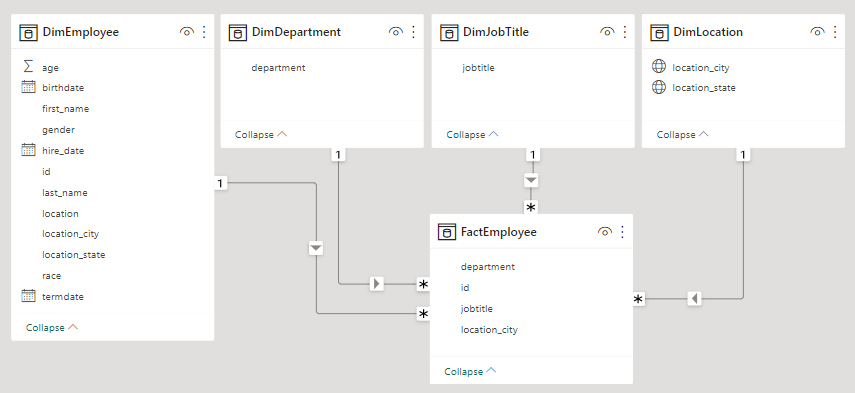

In [3]:
StartModel = Image (filename = p_StartModel)
display(StartModel)

### DashBoard Report Telegram

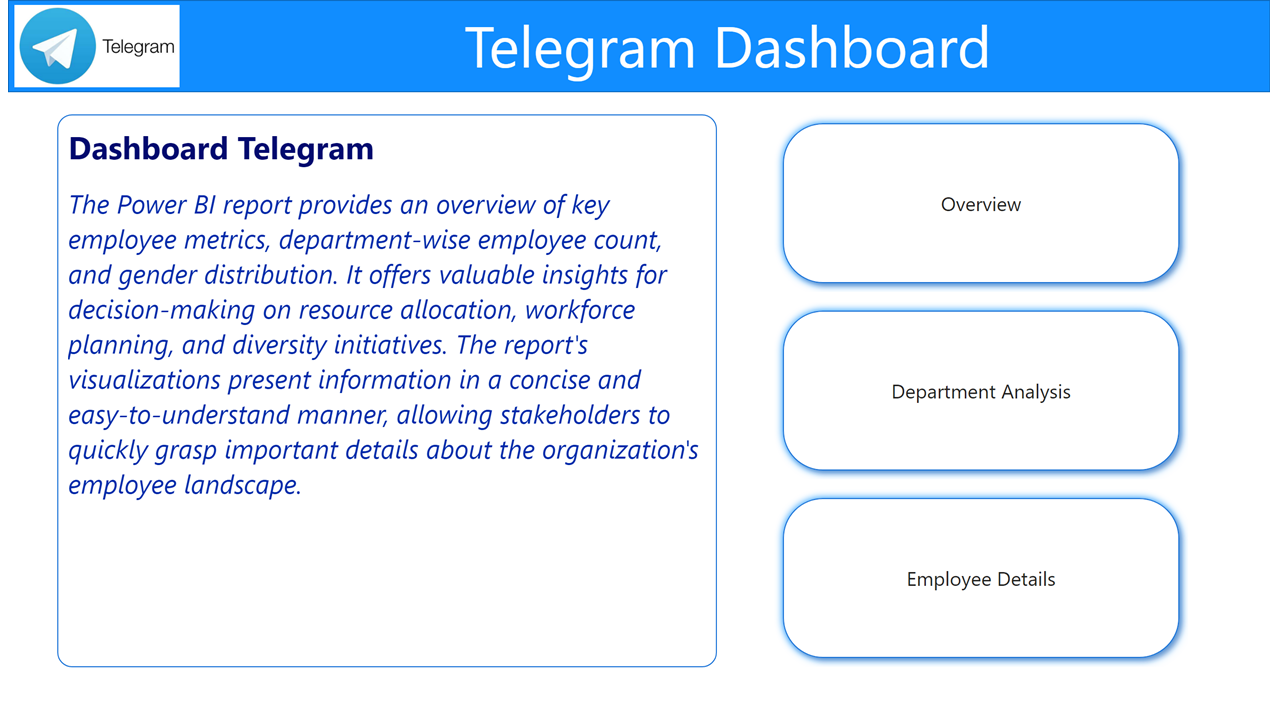

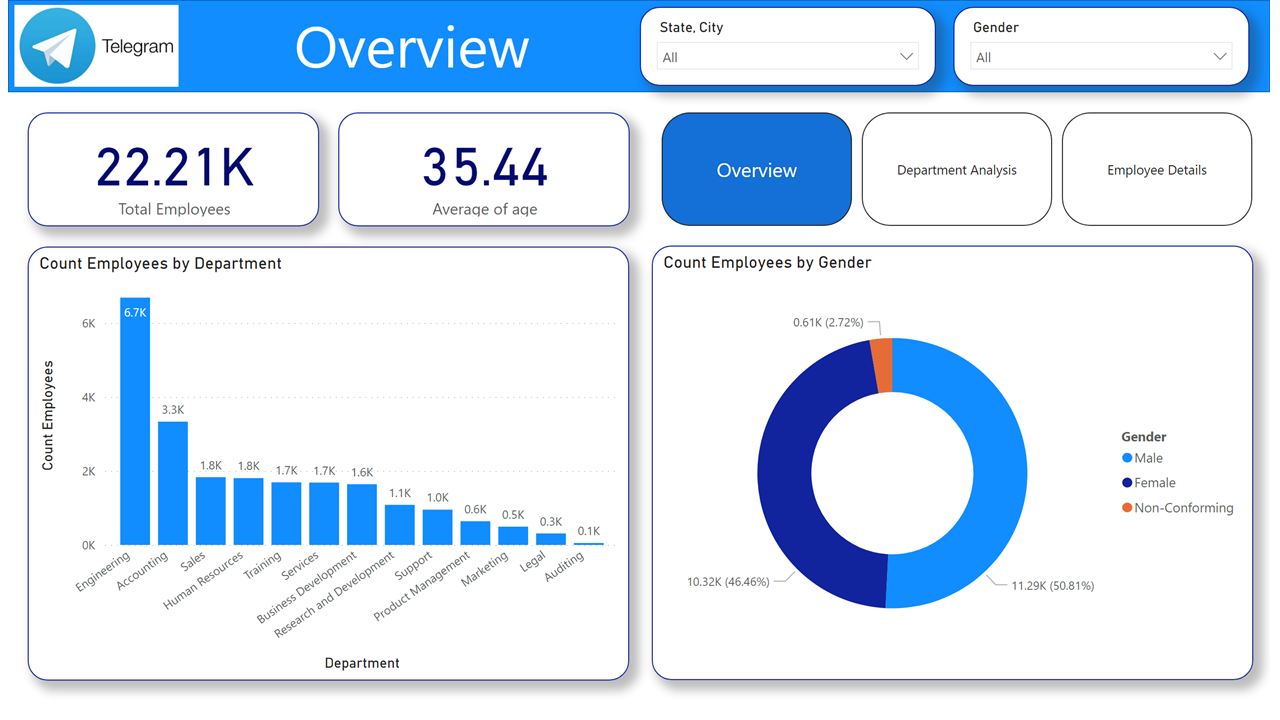

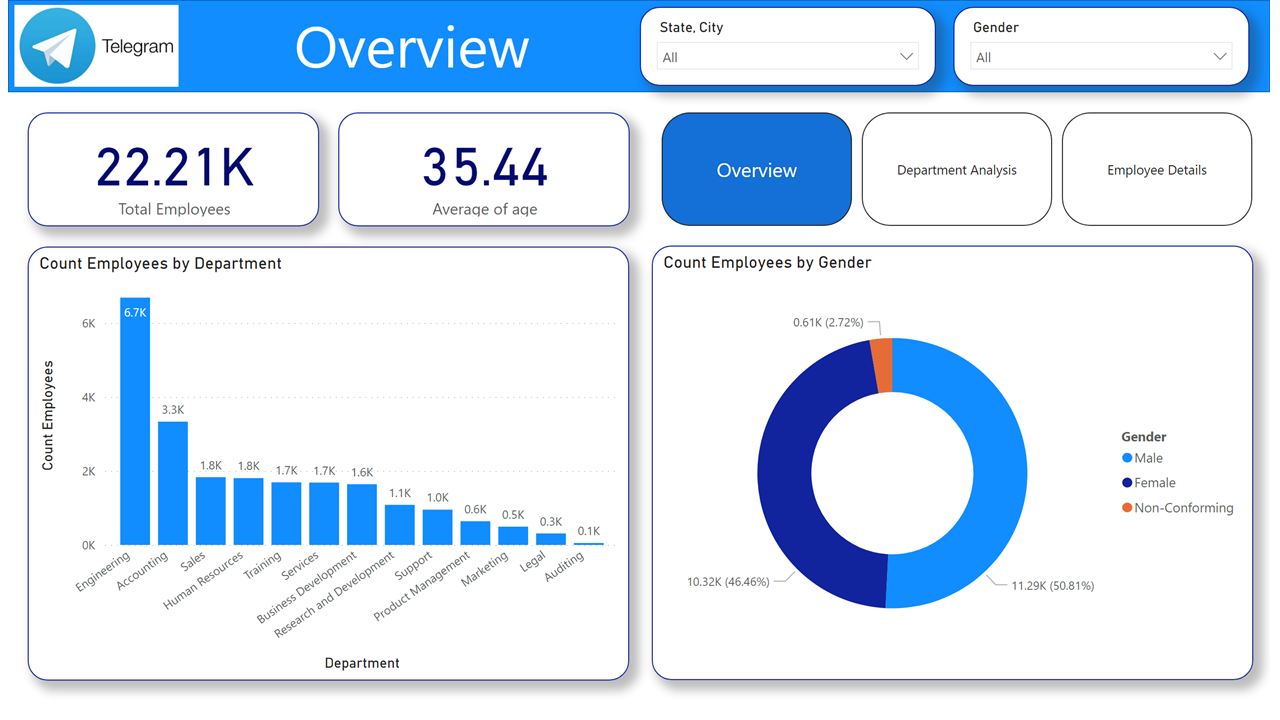

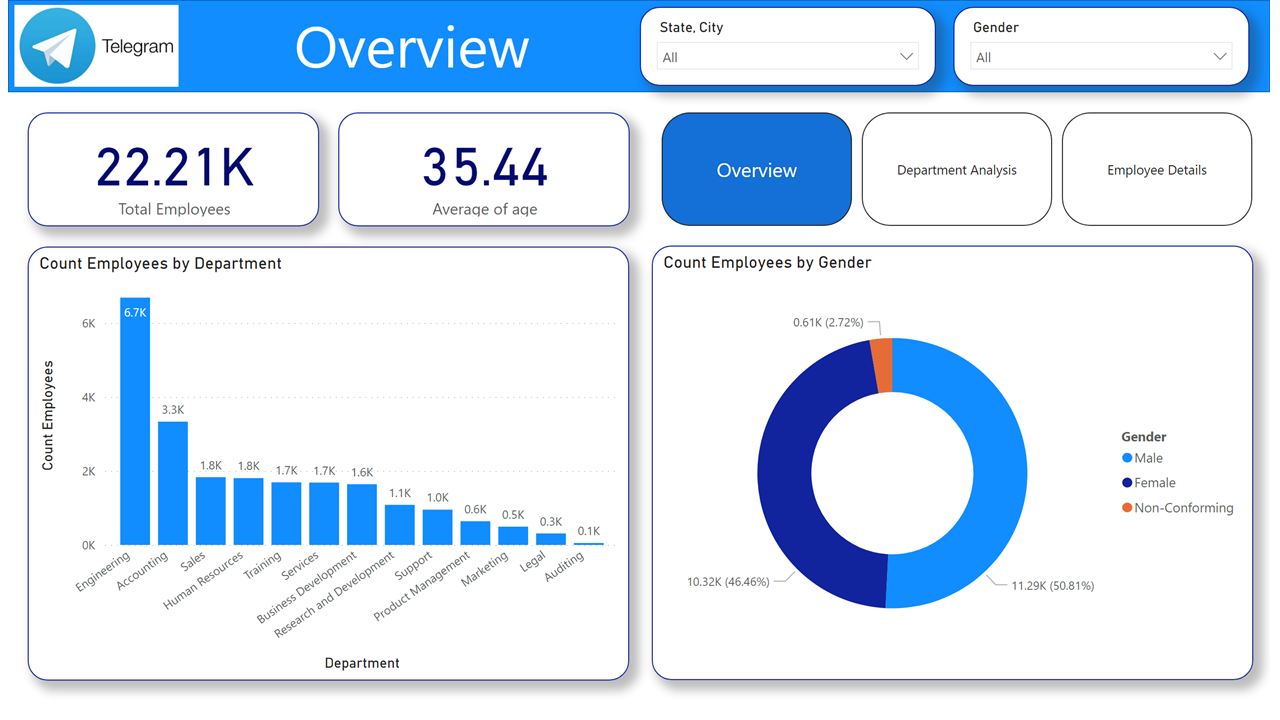

In [6]:
Menu = Image (filename = p_menu)
Overview = Image (filename = p_overview)
Department_Analysis = Image (filename = p_departmnt_analysis)
Employee_Details = Image (filename = p_employee_details)

display(Menu)
display(Overview)
display(Department_Analysis)
display(Employee_Details)